A notebook that simply extract the electrical conductivity profile from deterministic inversions

Neil Symington

In [1]:
%matplotlib inline

import netCDF4
import numpy as np
import os
import pandas as pd
from hydrogeol_utils import spatial_functions
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from geophys_utils._transect_utils import coords2distance
from hydrogeol_utils import SNMR_utils, AEM_utils, spatial_functions, borehole_utils
import hydrogeol_utils.plotting_utils as plot_utils
from geophys_utils._netcdf_point_utils import NetCDFPointUtils
import os, glob
import sqlalchemy as db
from sqlite3 import dbapi2 as sqlite
import netCDF4
import math
import os
import gc
import fiona
import matplotlib.pyplot as plt
from hydrogeol_utils.db_utils import makeCon, closeCon

In [2]:
# Open the AEM data file

nc_dir = r"C:\Users\PCUser\Desktop\NSC_data\data\AEM\HE\nc"
nc_inpath = os.path.join(nc_dir, "HowardsEast_wb_inversion.nc")

d = netCDF4.Dataset(nc_inpath)

In [2]:
# Open the AEM data file


root = r"C:\Users\PCUser\Desktop\NSC_data\data\AEM\DR\2017_DalyRiver_SkyTEM\03_LCI\01_Data"
nc_inpath = os.path.join(root, "DalyR_WB_MGA52.nc")
d = netCDF4.Dataset(nc_inpath)

In [6]:
# Get the coordinates we want to query


path = r"C:\Users\PCUser\Desktop\NSC_data\data\vector\HE_proposed_drillsites_2\Proposed bores2.shp"
shape = fiona.open(path)


In [29]:
infile = r"C:\Users\PCUser\Desktop\NSC_data\data\bores\NSC_bore_compilation.csv"

df = pd.read_csv(infile)
coords = df[['X','Y']].values.astype('float32')

In [8]:
points = {}

count = 1
while True:
    points[count] = shape.next()
    count+=1

C:\Users\PCUser\Anaconda3\envs\hydrogeol_utils\lib\site-packages\ipykernel_launcher.py:5: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  """


StopIteration: 

In [11]:
coords = np.nan*np.ones(shape = (len(points),2),
                        dtype = np.float64)

for i, item in enumerate(points):
    coords[i] = np.array(points[item]['geometry']['coordinates'])
    

In [4]:
# Get the AEM utm coordinates

aem_coords = np.column_stack((d['easting'][:], d['northing']))

In [43]:
# Extract the AEM conductivity using nearest neighbour
distances, indices = spatial_functions.nearest_neighbours(coords,
                                                          aem_coords,
                                                          points_required = 1,# return 10 closest points
                                                          max_distance = 50.)

In [44]:
df

,Borename,Ref_Datum,Datum_type,SWL_below_reference_datum,Latitude,Longitude,X,Y,AEM_DEM,SRTM1S,LiDAR5m,ground_mAHD,datum_mAHD,AEM_elevations
0,RN020967,0.600,5.0,19.68,-12.525400,131.178000,736689,8614367,NaN,32.013900,NaN,32.01390,32.61390,NaN
1,RN021012,0.790,10.0,9.38,-12.498900,131.123000,730706,8617355,30.11441,31.299240,NaN,30.11441,30.90441,NaN
2,RN021047,0.835,NaN,8.53,-12.495300,131.163000,735102,8617719,31.11323,30.815840,NaN,31.11323,31.94823,NaN
3,RN021396,1.030,10.0,12.61,-12.431800,131.163000,735110,8624739,26.68469,27.144670,NaN,26.68469,27.71469,NaN
4,RN021761,0.930,NaN,5.63,-12.482600,131.116000,730003,8619157,24.41714,25.979200,NaN,24.41714,25.34714,NaN
5,RN021762,0.690,10.0,13.42,-12.452900,131.108000,729162,8622458,20.41765,25.633330,NaN,20.41765,21.10765,NaN
6,RN021765,0.770,10.0,6.13,-12.482500,131.128000,731295,8619159,26.59971,31.031490,NaN,26.59971,27.36971,NaN
7,RN021768,0.640,10.0,7.81,-12.448300,131.126000,731115,8622945,21.20246,25.124160,NaN,21.20246,21.84246,NaN
8,RN021769,0.930,5.0,10.22,-12.448600,131.112000,729518,8622931,17.69845,19.180380,NaN,17.69845,18.62845,NaN
9,RN022060,0.390,10.0,10.03,NaN,NaN,729493,8622929,17.65000,19.050000,NaN,17.65000,18.04000,NaN


In [45]:
elevs

array([  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan, 120.9,   nan,   nan,   nan,
         nan,  99.8,   nan,   nan,  59.3,  69.2,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan], dtype=float32)

In [46]:
elevs = np.nan*np.ones(shape = len(distances), dtype = np.float32)
trueind = indices.copy()[np.where(np.isfinite(distances))]
elevs[np.where(np.isfinite(distances))] = d['elevation'][trueind].data

In [47]:
distances

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 22.0391165,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan])

In [48]:
df['AEM_elevations'] = elevs

df

,Borename,Ref_Datum,Datum_type,SWL_below_reference_datum,Latitude,Longitude,X,Y,AEM_DEM,SRTM1S,LiDAR5m,ground_mAHD,datum_mAHD,AEM_elevations
0,RN020967,0.600,5.0,19.68,-12.525400,131.178000,736689,8614367,NaN,32.013900,NaN,32.01390,32.61390,NaN
1,RN021012,0.790,10.0,9.38,-12.498900,131.123000,730706,8617355,30.11441,31.299240,NaN,30.11441,30.90441,NaN
2,RN021047,0.835,NaN,8.53,-12.495300,131.163000,735102,8617719,31.11323,30.815840,NaN,31.11323,31.94823,NaN
3,RN021396,1.030,10.0,12.61,-12.431800,131.163000,735110,8624739,26.68469,27.144670,NaN,26.68469,27.71469,NaN
4,RN021761,0.930,NaN,5.63,-12.482600,131.116000,730003,8619157,24.41714,25.979200,NaN,24.41714,25.34714,NaN
5,RN021762,0.690,10.0,13.42,-12.452900,131.108000,729162,8622458,20.41765,25.633330,NaN,20.41765,21.10765,NaN
6,RN021765,0.770,10.0,6.13,-12.482500,131.128000,731295,8619159,26.59971,31.031490,NaN,26.59971,27.36971,NaN
7,RN021768,0.640,10.0,7.81,-12.448300,131.126000,731115,8622945,21.20246,25.124160,NaN,21.20246,21.84246,NaN
8,RN021769,0.930,5.0,10.22,-12.448600,131.112000,729518,8622931,17.69845,19.180380,NaN,17.69845,18.62845,NaN
9,RN022060,0.390,10.0,10.03,NaN,NaN,729493,8622929,17.65000,19.050000,NaN,17.65000,18.04000,NaN


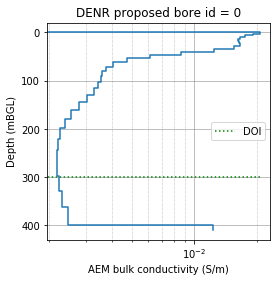

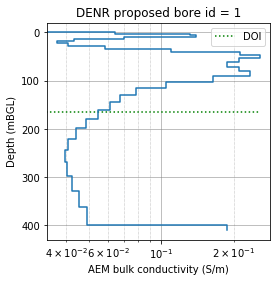

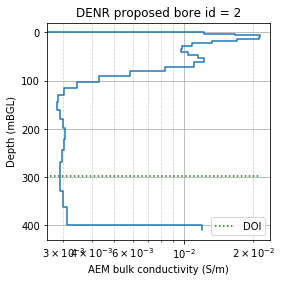

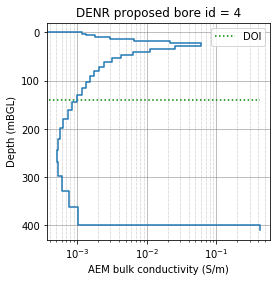

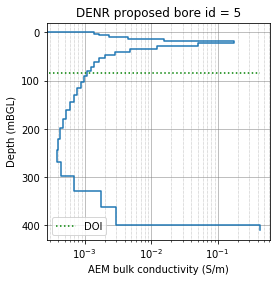

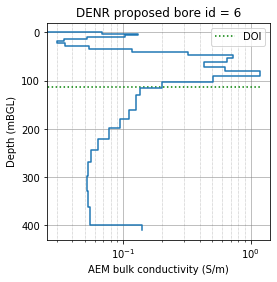

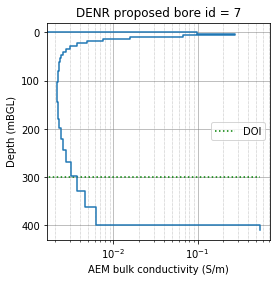

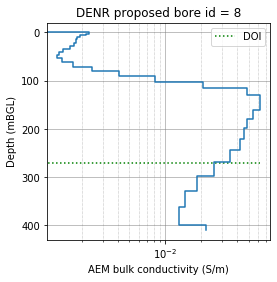

In [60]:
elevs = []
# plot the AEM conductivity profile

for i in range(len(points)):
    priority = points[i+1]['properties']['Priority']
    id_ = points[i+1]['id']
    ind = indices[i]
    dist = distances[i]
    if np.isnan(dist):
        elevs.append(np.nan)
        continue
    depth_top = d['layer_top_depth'][ind].data
    cond = d['conductivity'][ind].data
    doi = d['depth_of_investigation'][ind]
    elevs.append(d['elevation'][ind].data)
    fig, ax = plt.subplots(1,1, figsize = (4,4))

    plot_utils.plot_1D_layered_model(ax, cond, depth_top, doi=doi, log_plot=True)
    ax.set_xlabel('AEM bulk conductivity (S/m)')
    ax.set_ylabel('Depth (mBGL)')
    title = 'DENR proposed bore id = ' + str(id_)
    ax.set_title(title)
    #plt.savefig(r"C:\Users\PCUser\Desktop\NSC_data\interp\\" + title + "_AEM_profile.png",
    #           dpi = 300)
    plt.show()
    
    

In [127]:
# Now lets plot the sections

lines =  d['line'][d['line_index'][trueind]].data

In [150]:
lines = [200301]

In [14]:
trueind = indices.copy()[np.where(np.isfinite(distances))]
trueind

array([24806, 80018, 93294, 51412, 34306, 45746, 46490, 91235])

In [16]:
trueind

array([24806, 80018, 93294, 51412, 34306, 45746, 46490, 91235])

In [151]:
wb_plots = plot_utils.ConductivitySectionPlot(d)


# Define some key variables which we want to inteprolate

cond_vars = ['conductivity', 'data_residual', 'depth_of_investigation',
                               'easting', 'northing']

wb_plots.conductivity_variables = cond_vars

xres, yres = 20,2

gridded_variables = wb_plots.grid_variables(xres = xres, yres =yres, lines=lines, smoothed=False,
                                         resampling_method = 'linear', save_hdf5 = False, return_dict = True)

In [65]:
elevs = np.array(elevs)

elevs.shape

(9,)

In [67]:
# Create a dataframe for the bores

df = pd.DataFrame(columns = ['Easting', 'Northing'],
                  data = np.tile(coords,2).reshape(len(coords) *2, 2))

df['id'] = np.repeat(np.arange(0,9),2)

df['Depth'] = np.tile([0.,200.],9)

df['Val'] = 0.

df['elevation'] = np.repeat(elevs, 2) - np.tile([0.,200.],9)

In [86]:
df2 = df.iloc[2*np.arange(0,9)]
df2.rename(columns = {'Depth':'Depth_from'}, inplace = True)
df2['Depth_to'] = np.repeat([200.], 9)

C:\Users\PCUser\Anaconda3\envs\hydrogeol_utils\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
lines

array([106701, 114901])

In [69]:
df.to_csv(r'C:\Users\PCUser\Desktop\NSC_data\Geoscene\GeosceneData\HE_DENR_proposed_bores_template.csv',
         index = False)

In [70]:
gridded_variables

{106701: {'conductivity': array([[       nan,        nan,        nan, ...,        nan,        nan,
                 nan],
         [       nan,        nan,        nan, ...,        nan,        nan,
                 nan],
         [       nan,        nan,        nan, ...,        nan,        nan,
                 nan],
         ...,
         [0.02021836, 0.02353765, 0.02525807, ...,        nan,        nan,
                 nan],
         [0.02021836, 0.02353765, 0.02525807, ...,        nan,        nan,
                 nan],
         [0.02021836, 0.02353765, 0.02525807, ...,        nan,        nan,
                 nan]], dtype=float32),
  'layer_top_depth': array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         ...,
         [362.7, 362.7, 362.7, ...,   nan,   nan,   nan],
         [362.7, 362.7, 362.7, ...,   nan,   nan,   nan],
         [362.7, 362.7, 362.7, ...

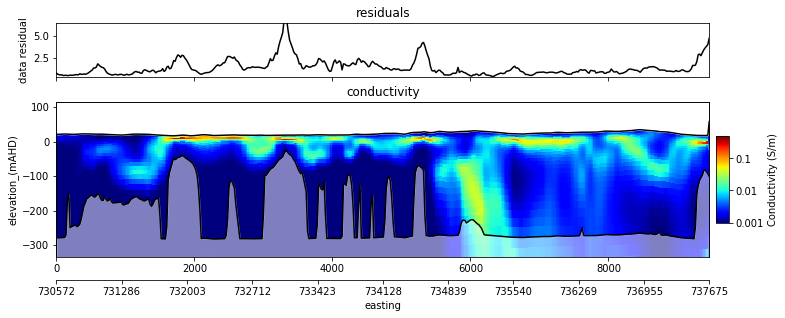

In [153]:
# Panel plotting different CGI inversions

#line = lines[8]

line = 200301

vex = 5.

max_depth = 350.

vmin, vmax = 0.001,0.5

# NOte that the vertical exaggeration and the max depth don't always play nicely
panel_settings = {'panel_1': {'variable': 'data_residual',
                             'plot_type': 'line',
                             'panel_kwargs': {'title': 'residuals', 'color': 'black',
                                              'ylabel': 'data residual',
                                              'legend': False},
                             'height_ratio': 1},

                  'panel_2': {'variable': 'conductivity',
                             'plot_type': 'grid',
                             'panel_kwargs': {'title': 'conductivity',
                                              'max_depth': max_depth, 'shade_doi': True, 'colourbar': True,
                                              'colourbar_label': 'Conductivity (S/m)',
                                             'log_plot': True, 'vmin': vmin, 'vmax': vmax,
                                             'cmap': 'jet', 'ylabel': 'elevation_(mAHD)',
                                             'vertical_exaggeration':vex},
                             'height_ratio': 3}}

# Get ax_array length lists of the panel settings
panel_kwargs  = plot_utils.unpack_plot_settings(panel_settings,
                                             'panel_kwargs')


height_ratios = plot_utils.unpack_plot_settings(panel_settings,
                                                'height_ratio')


# Relative position of the colourbar
x0, y0, width, height = [1.01, 0., 0.02, 1.]

plot_settings = {'vertical_margin': 1.,
                    'panel_vgap': 0.5, 'plot_width': 11.7 #A3 width
                }                        

# Close previous plots
plt.close()

# Intialise figure
fig, ax_array = plt.subplots(len(panel_settings), 1, sharex = True,
                                     gridspec_kw={'height_ratios':
                                                  height_ratios})

res1 = plot_utils.plot_single_line(ax_array[0], gridded_variables[line],
                                   'data_residual', panel_kwargs[0])

ax_array[0].set_title(panel_kwargs[0]['title'])


im1 = plot_utils.plot_grid(ax_array[1], gridded_variables[line], 'conductivity',
                   panel_kwargs[1])

ax_array[1].set_title(panel_kwargs[1]['title'])



# Format the figure to size it for the specified vertical exaggeration
plot_utils.format_panels(ax_array, panel_settings, plot_settings)

savefig = False

# Add the induction
for bore in df2['id'].values:
    
    mask = (df2['id'] == bore)

   
    plot_utils.add_1d_layered_model(ax_array[1], df2, 
                                    gridded_variables[line],
                                    'Val',
                                    ['Easting', 'Northing'], cmap='binary',
                                   stick_thickness=100.)
            

# Add colorbars
plot_utils.add_colourbar(fig, ax_array[1], im1, x0, y0, width, height, panel_kwargs[1])


ax_pos = plot_utils.align_axes(ax_array)

# Add axis with northing at the bottom of the plot

#plot_utils.add_axis_coords('northing', nor, ax_array[-1], ax_pos[3], offset=-0.4)

#
plot_utils.add_axis_coords('easting', gridded_variables[line]['easting'], ax_array[-1], ax_pos[1], offset=-0.15)

outdir = r"C:\Users\PCUser\Desktop\NSC_data\interp"
    
outfile = os.path.join(outdir, str(line) + "_section_proposed_bores.png")

savefig = False

if savefig:
    print('Figure saved')
    plt.savefig(outfile, dpi=300)

plt.show()

In [144]:
gridded_variables[line]['data_residual']

array([0.56734142, 0.72257454, 1.0712548 , 0.79772257, 0.70060838,
       0.88286916, 1.317909  , 1.76985962, 1.65930293, 1.61390213,
       1.60345722, 1.54599925, 1.46907828, 1.50243361, 1.38923381,
       1.15065897, 0.83020179, 0.83994102, 0.89765204, 0.91880437,
       0.87652289, 1.06358813, 0.82596151, 0.59512768, 0.62511968,
       0.79190017, 0.82055483, 0.8810288 , 1.00953257, 1.13803634,
       1.26654011, 1.39504388, 1.51474413, 1.43932609, 1.3399248 ,
       1.18723727, 1.08966499, 1.36702766, 1.06917427, 0.89883205,
       0.90418729, 0.90954253, 0.91489776, 0.920253  , 0.92560824,
       0.93096347, 0.93631871, 0.94167395, 0.94702918, 0.95238442,
       0.95773966, 0.96309489, 0.96845013, 0.97380537, 0.9791606 ,
       0.98451584, 0.98987108, 0.99522631, 1.00058155, 1.00593679,
       1.01129203, 1.01664726, 1.0220025 , 1.02735774, 1.03271297,
       1.03806821, 1.04342345, 1.04877868, 1.05413392, 1.05948916,
       1.06484439, 1.07019963, 1.07555487, 1.0809101 , 1.08626